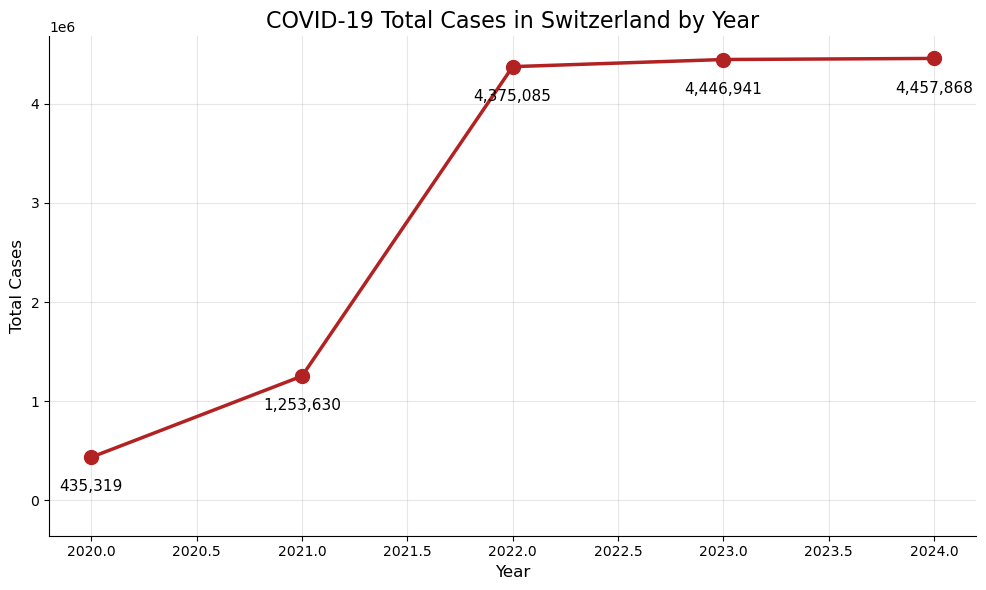

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the COVID data
data_covid = pd.read_csv("../Data/full_data.csv")

# Filter only for Switzerland
switzerland_data = data_covid[data_covid['location'] == 'Switzerland'].copy()

# Convert date to datetime format
switzerland_data['date'] = pd.to_datetime(switzerland_data['date'])

# Extract year for grouping
switzerland_data['year'] = switzerland_data['date'].dt.year

# Get the end-of-year totals (or latest available data for each year)
yearly_data = switzerland_data.groupby('year').agg({'total_cases': 'max'}).reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Plot the line with markers
plt.plot(yearly_data['year'], yearly_data['total_cases'], 
         marker='o', markersize=10, linewidth=2.5, color='firebrick')

# Add value labels BELOW each point
for x, y in zip(yearly_data['year'], yearly_data['total_cases']):
    plt.text(x, y - (yearly_data['total_cases'].max() * 0.05),  # Small offset below point
             f'{int(y):,}',
             ha='center', va='top', fontsize=11)

# Styling
plt.title('COVID-19 Total Cases in Switzerland by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.grid(True, alpha=0.3)

# Ensure the y-axis has enough room at the bottom for labels
bottom_margin = yearly_data['total_cases'].max() * 0.08
plt.ylim(bottom=-bottom_margin, top=yearly_data['total_cases'].max() * 1.05)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()